# Chapter 6 - Explore Variables with Scatter Plots, and Filter and Subset with Sliders

* Learning about the different ways of using scatter plots: markers, lines, and text 
* Creating multiple scatter traces in one plot 
* Mapping and setting colors with scatter plots 
* Handling over-plotting and outlier values by managing opacity, symbols, and scales 
* Introducing Sliders and Range Sliders 
* Customizing the marks and values of sliders 
* Using sliders in callback functions 
* Incorporating a scatter plot into the dashboard with interactivity controlled by sliders 

In [1]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import dash
import jupyter_dash as jd
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
import pandas as pd
pd.options.display.max_columns = None

for p in [plotly, dash, jd, dcc, html, dbc, pd]:
    print(f'{p.__name__:-<30}v{p.__version__}')

plotly------------------------v4.14.3
dash--------------------------v1.20.0
jupyter_dash------------------v0.4.0
dash_core_components----------v1.16.0
dash_html_components----------v1.1.3
dash_bootstrap_components-----v0.12.0
pandas------------------------v1.2.3


In [2]:
poverty = pd.read_csv('../data/poverty.csv', low_memory=False)
poverty.head(2)

Country Name Country Code  year  \
0  Afghanistan          AFG  1974   
1  Afghanistan          AFG  1975   

   Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)  \
0                                                NaN                                        
1                                                NaN                                        

   Annualized growth in per capita real survey mean consumption or income, top 10% (%)  \
0                                                NaN                                     
1                                                NaN                                     

   Annualized growth in per capita real survey mean consumption or income, top 60% (%)  \
0                                                NaN                                     
1                                                NaN                                     

   Annualized growth in per capita real survey mean consumption or income, total population (%)  \
0                                                NaN                                              
1                                                NaN                                              

   Annualized growth in per capita real survey median income or consumption expenditure (%)  \
0                                                NaN                                          
1                                                NaN                                          

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   

   Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               

   Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               

   Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               

   Income share held by fourth 20%  Income share held by highest 10%  \
0                              NaN                               NaN   
1                              NaN                               NaN   

   Income share held by highest 20%  Income share held by lowest 10%  \
0                               NaN                              NaN   
1                               NaN                              NaN   

   Income share held by lowest 20%  Income share held by second 20%  \
0                              NaN                              NaN   
1                              NaN                              NaN   

   Income share held by third 20%  \
0                             NaN   
1                             NaN   

   Median daily per capita income or consumption expenditure (2011 PPP)  \
0                                                NaN                      
1                                                NaN                      

   Multidimensional poverty, Drinking water (% of population deprived)  \
0                                                NaN                     
1                                                NaN                     

   Multidimensional poverty, Educational attainment (% of population deprived)  \
0                                                NaN                             
1                                                NaN                             

   Multidimensional poverty, Educational enrollment (% of population deprived)  \
0                                                NaN                 

In [3]:
series = pd.read_csv('../data/PovStatsSeries.csv')
series = (series
          .assign(code=series['Series Code'].str.replace('\.', '_', regex=True).str.lower()))
series.head(2)

Series Code                         Topic  \
0  SI.DST.02ND.20  Poverty: Income distribution   
1  SI.DST.03RD.20  Poverty: Income distribution   

                    Indicator Name Short definition  \
0  Income share held by second 20%              NaN   
1   Income share held by third 20%              NaN   

                                     Long definition Unit of measure  \
0  Percentage share of income or consumption is t...               %   
1  Percentage share of income or consumption is t...               %   

  Periodicity  Base Period  Other notes Aggregation method  \
0      Annual          NaN          NaN                NaN   
1      Annual          NaN          NaN                NaN   

                          Limitations and exceptions  \
0  Despite progress in the last decade, the chall...   
1  Despite progress in the last decade, the chall...   

   Notes from original source  \
0                         NaN   
1                         NaN   

                                    General comments  \
0  The World Bank’s internationally comparable po...   
1  The World Bank’s internationally comparable po...   

                                              Source  \
0  World Bank, Development Research Group. Data a...   
1  World Bank, Development Research Group. Data a...   

                 Statistical concept and methodology  \
0  Inequality in the distribution of income is re...   
1  Inequality in the distribution of income is re...   

                               Development relevance Related source links  \
0  The World Bank Group's goal of promoting share...                  NaN   
1  The World Bank Group's goal of promoting share...                  NaN   

   Other web links  Related indicators License Type  Unnamed: 20  \
0              NaN                 NaN    CC BY-4.0          NaN   
1              NaN                 NaN    CC BY-4.0          NaN   

             code  
0  si_dst_02nd_20  
1  si_dst_03rd_20

In [4]:
[f for f in dir(px) if 'scatter' in f]

['scatter',
 'scatter_3d',
 'scatter_geo',
 'scatter_mapbox',
 'scatter_matrix',
 'scatter_polar',
 'scatter_ternary']

In [5]:
import plotly.graph_objects as go
fig = go.Figure()

[f for f in dir(fig) if 'scatter' in f]

['add_scatter',
 'add_scatter3d',
 'add_scattercarpet',
 'add_scattergeo',
 'add_scattergl',
 'add_scattermapbox',
 'add_scatterpolar',
 'add_scatterpolargl',
 'add_scatterternary']

In [6]:
perc_pov_cols = poverty.filter(regex='Poverty gap').columns
perc_pov_cols

Index(['Poverty gap at $1.90 a day (2011 PPP) (%)',
       'Poverty gap at $3.20 a day (2011 PPP) (% of population)',
       'Poverty gap at $5.50 a day (2011 PPP) (% of population)'],
      dtype='object')

In [7]:
perc_pov_19 = perc_pov_cols[0]
perc_pov_32 = perc_pov_cols[1]
perc_pov_55 = perc_pov_cols[2]

In [8]:
series[series['Indicator Name']==perc_pov_19]['Short definition'][25]

'Poverty gap at $1.90 a day (2011 PPP) is the mean shortfall in income or consumption from the poverty line $1.90 a day (counting the nonpoor as having zero shortfall), expressed as a percentage of the poverty line. This measure reflects the depth of poverty as well as its incidence. As a result of revisions in PPP exchange rates, poverty rates for individual countries cannot be compared with poverty rates reported in earlier editions.'

In [9]:
series['Long definition'][29]

'Poverty gap at $3.20 a day (2011 PPP) is the mean shortfall in income or consumption from the poverty line $3.20 a day (counting the nonpoor as having zero shortfall), expressed as a percentage of the poverty line. This measure reflects the depth of poverty as well as its incidence.'

In [10]:
print(series[series['Indicator Name']==perc_pov_19]['Limitations and exceptions'][25])

Despite progress in the last decade, the challenges of measuring poverty remain. The timeliness, frequency, quality, and comparability of household surveys need to increase substantially, particularly in the poorest countries. The availability and quality of poverty monitoring data remains low in small states, countries with fragile situations, and low-income countries and even some middle-income countries. The low frequency and lack of comparability of the data available in some countries create uncertainty over the magnitude of poverty reduction. 

Besides the frequency and timeliness of survey data, other data quality issues arise in measuring household living standards. The surveys ask detailed questions on sources of income and how it was spent, which must be carefully recorded by trained personnel. Income is generally more difficult to measure accurately, and consumption comes closer to the notion of living standards. And income can vary over time even if living standards do not.

In [11]:
country = 'China'
df = poverty[poverty['Country Name']==country][['year', perc_pov_19]].dropna()

In [12]:
from itertools import combinations
modes = ['markers', 'lines', 'text']

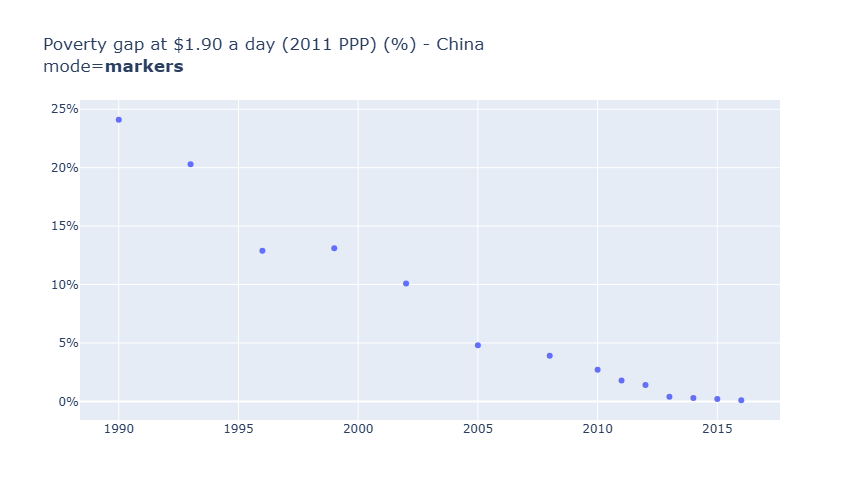

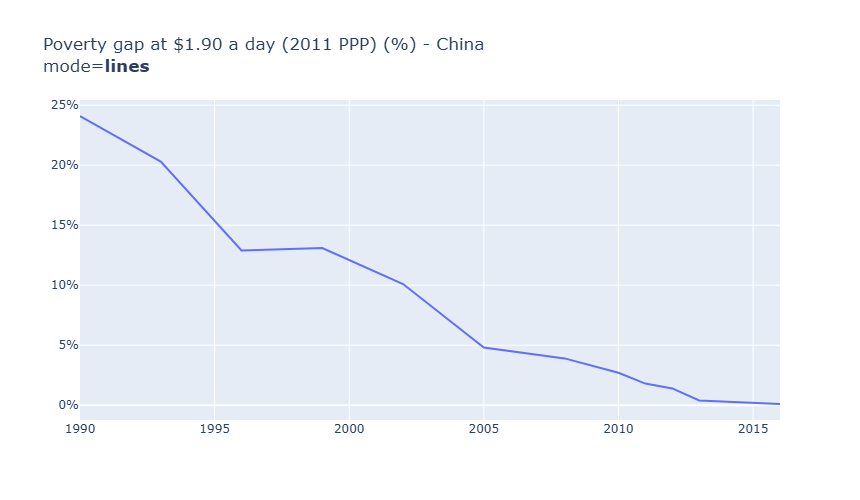

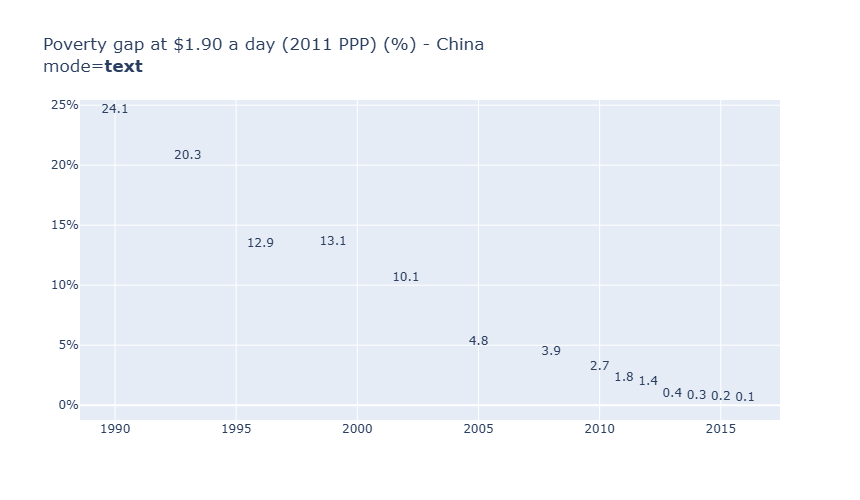

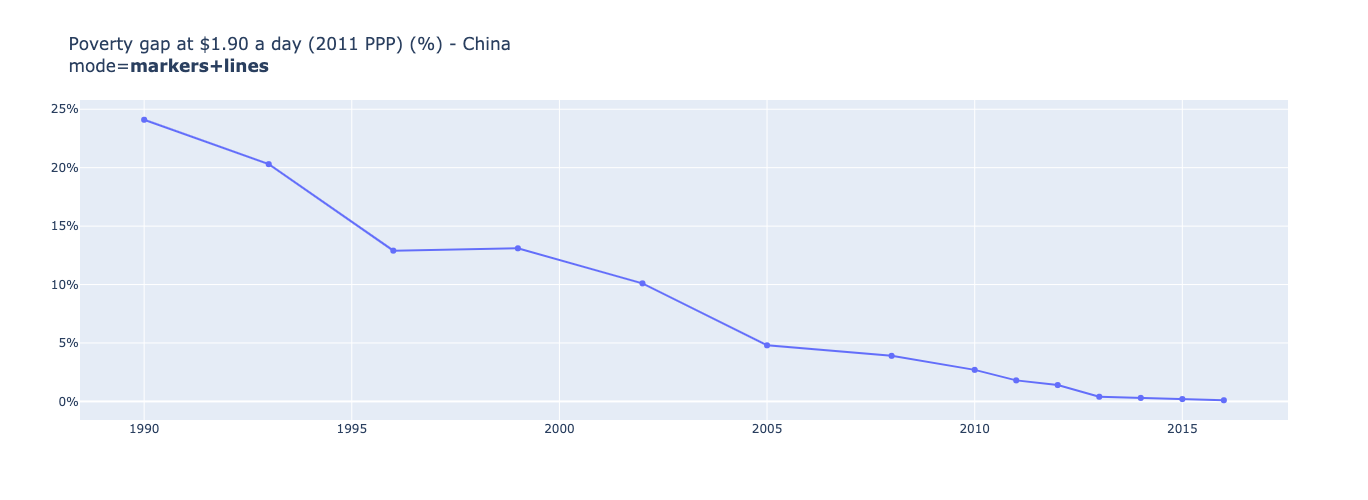

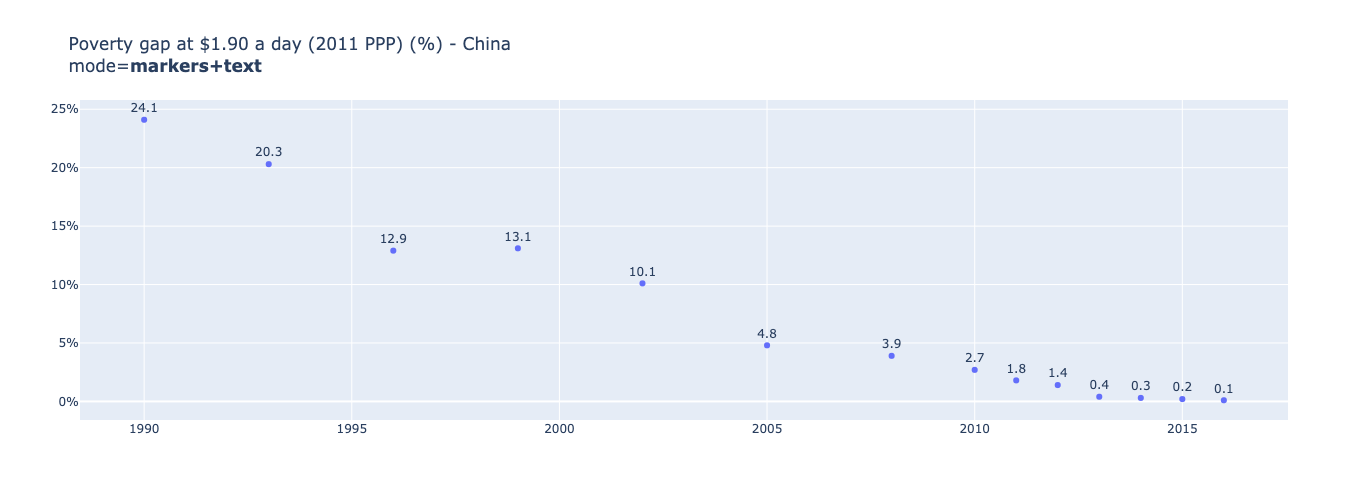

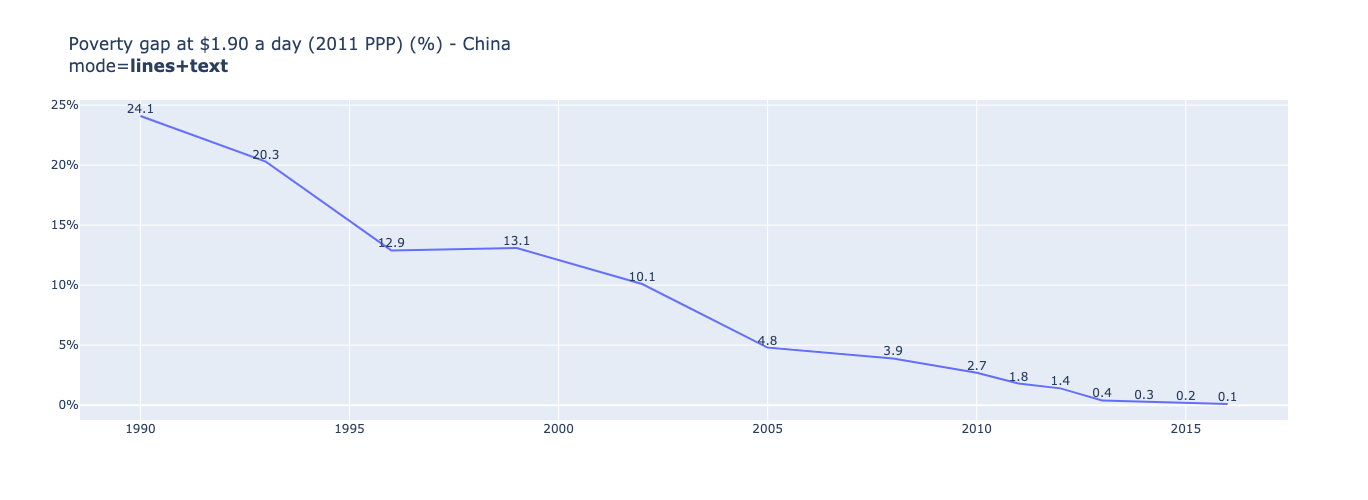

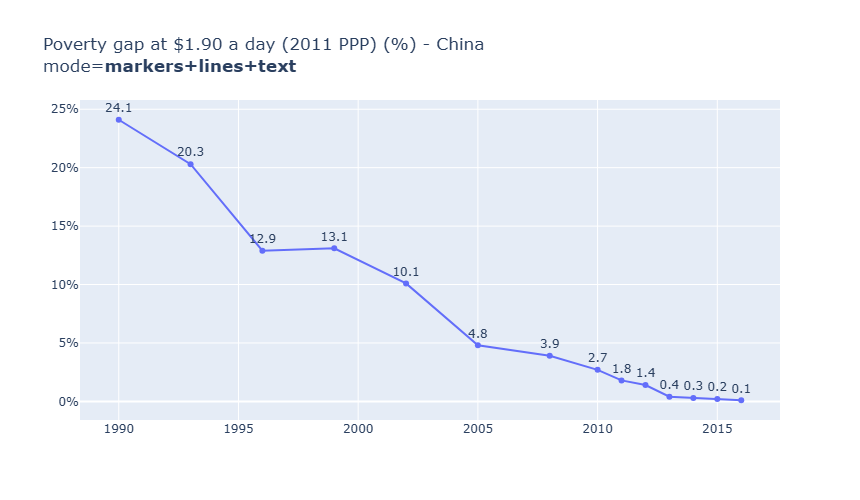

In [13]:
for i in range(1, 4):
    for comb in combinations(modes, i):
        fig = go.Figure()
        fig.add_scatter(x=df['year'], 
                        y=df[perc_pov_19],
                        text=df[perc_pov_19],
                        mode='+'.join(comb), 
                        textposition='top center')
        fig.layout.title =f'{perc_pov_19} - China<br>mode=<b>{"+".join(comb)}</b>'
        fig.layout.yaxis.ticksuffix = '%'
        fig.layout.width = 750
        fig.layout.height = 500
#         fig.write_image('+'.join(comb) + '.png', scale=2)
        fig.show()

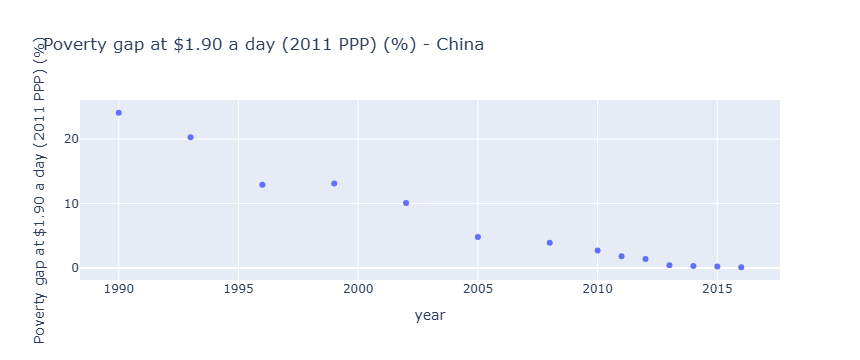

In [14]:
px.scatter(df, x='year', y=perc_pov_19, title=f'{perc_pov_19} - China')

In [15]:
countries = ['Argentina', 'Mexico', 'Brazil']
df = (poverty
      [poverty['Country Name'].isin(countries)]
      [['year','Country Name', perc_pov_19]]
      .dropna())

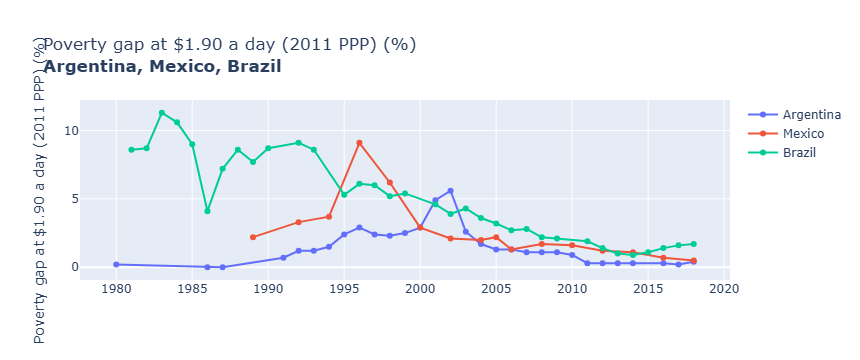

In [16]:
fig = go.Figure()
for country in countries:
    df_country = df[df['Country Name']==country]
    fig.add_scatter(x=df_country['year'], 
                    y=df_country[perc_pov_19],
                    name=country, mode='markers+lines')
fig.layout.title = perc_pov_19 + '<br><b>' + ', '.join(countries) + '</b>' 
fig.layout.yaxis.title = perc_pov_19
fig

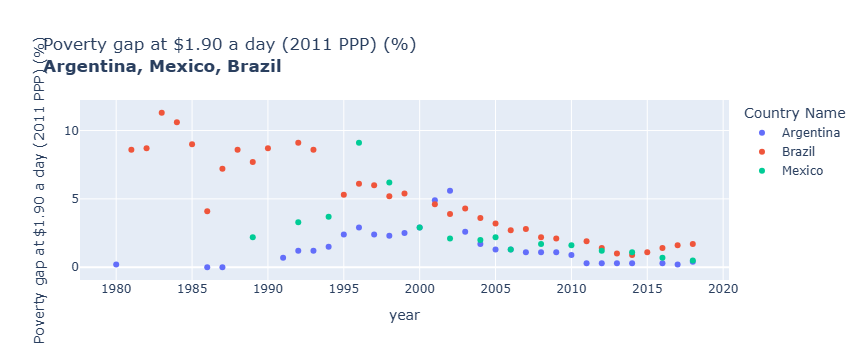

In [17]:
px.scatter(df, x='year', y=perc_pov_19, color='Country Name', title=perc_pov_19 + '<br><b>' + ', '.join(countries) + '</b>' )

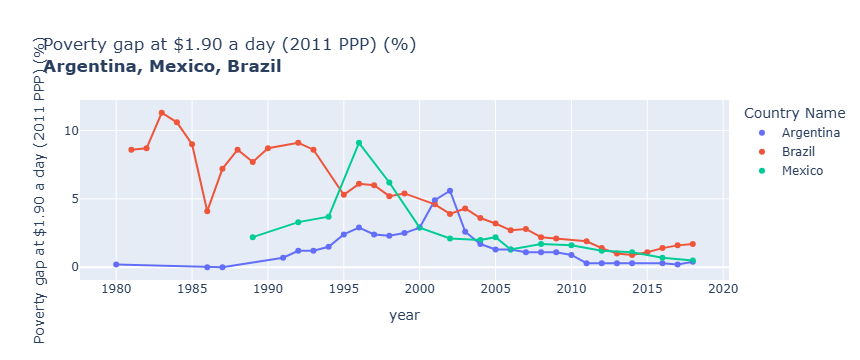

In [18]:
fig = px.scatter(df, x='year', y=perc_pov_19, color='Country Name',
                 title=perc_pov_19 + '<br><b>' + ', '.join(countries) + '</b>')
fig_lines = px.line(df, x='year', y=perc_pov_19, color='Country Name')
for trace in fig_lines.data:
    trace.showlegend = False
    fig.add_trace(trace)

fig

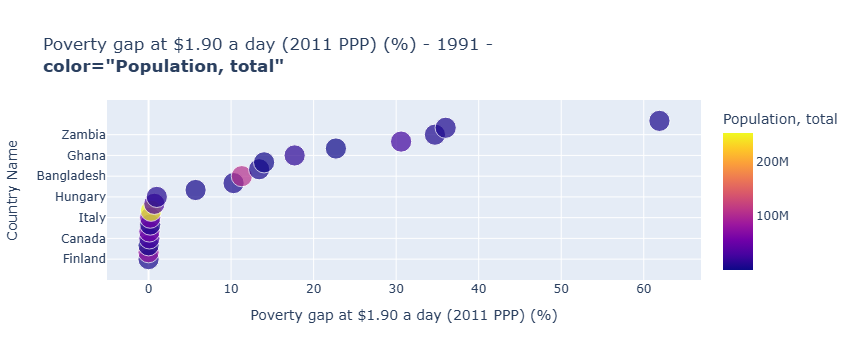

In [19]:
indicator = perc_pov_19
year = 1991

df = poverty[poverty['year'].eq(year) & poverty['is_country']].dropna(subset=[indicator]).sort_values(indicator)

px.scatter(df,
           x=indicator, 
           y='Country Name',
           color='Population, total',
           title=' - '.join([indicator, str(year), '<br><b>color="Population, total"</b>']),
           hover_name='Country Name',
           height=550,
           size_max=15,
           size=[10] * len(df))

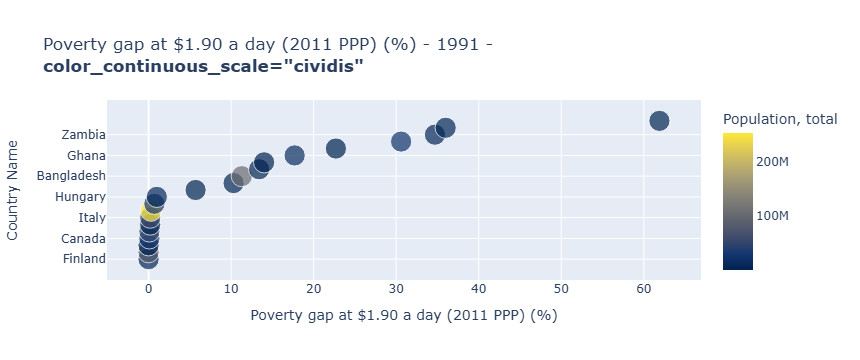

In [20]:
px.scatter(df,
           x=indicator, 
           y='Country Name',
           color='Population, total', 
           color_continuous_scale='cividis',
           title=' - '.join([indicator, str(year), '<br><b>color_continuous_scale="cividis"</b>']),
           hover_name='Country Name',
           height=550,
           size_max=15,
           size=[10] * len(df))

In [21]:
scales = sorted(plotly.colors.named_colorscales())
print(f"Plotly Named Colorscales ({len(scales)} scales):\n")
print(*scales, sep=', ')

Plotly Named Colorscales (94 scales):

aggrnyl, agsunset, algae, amp, armyrose, balance, blackbody, bluered, blues, blugrn, bluyl, brbg, brwnyl, bugn, bupu, burg, burgyl, cividis, curl, darkmint, deep, delta, dense, earth, edge, electric, emrld, fall, geyser, gnbu, gray, greens, greys, haline, hot, hsv, ice, icefire, inferno, jet, magenta, magma, matter, mint, mrybm, mygbm, oranges, orrd, oryel, oxy, peach, phase, picnic, pinkyl, piyg, plasma, plotly3, portland, prgn, pubu, pubugn, puor, purd, purp, purples, purpor, rainbow, rdbu, rdgy, rdpu, rdylbu, rdylgn, redor, reds, solar, spectral, speed, sunset, sunsetdark, teal, tealgrn, tealrose, tempo, temps, thermal, tropic, turbid, turbo, twilight, viridis, ylgn, ylgnbu, ylorbr, ylorrd


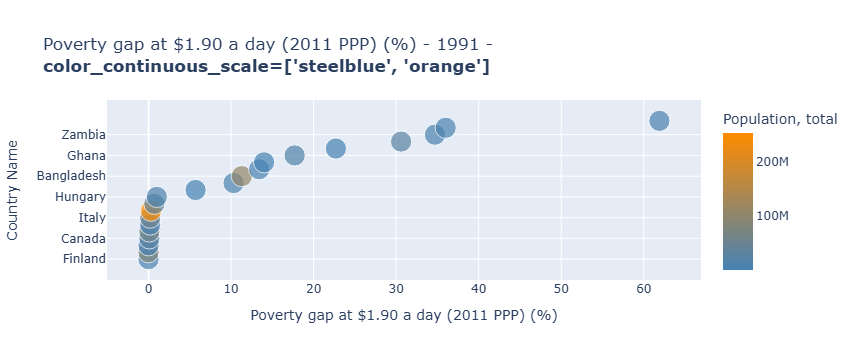

In [22]:
px.scatter(df,
           x=indicator, 
           y='Country Name',
           color='Population, total', 
           color_continuous_scale=['steelblue', 'darkorange'],
           title=' - '.join([indicator, str(year), "<br><b>color_continuous_scale=['steelblue', 'orange']</b>"]),
           hover_name='Country Name',
           size_max=15,
           height=550,
           size=[10] * len(df))

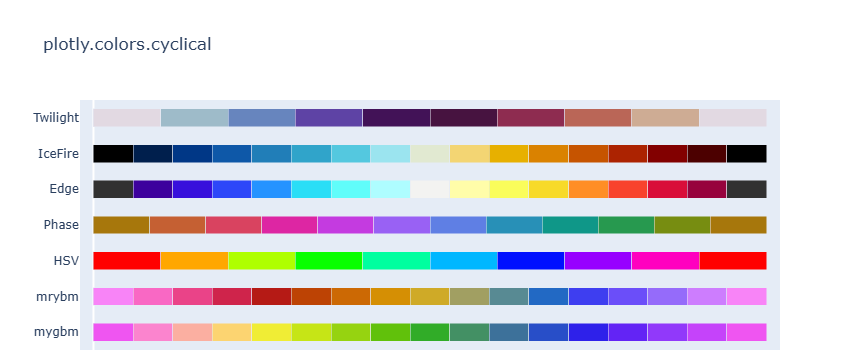

In [23]:
px.colors.cyclical.swatches()

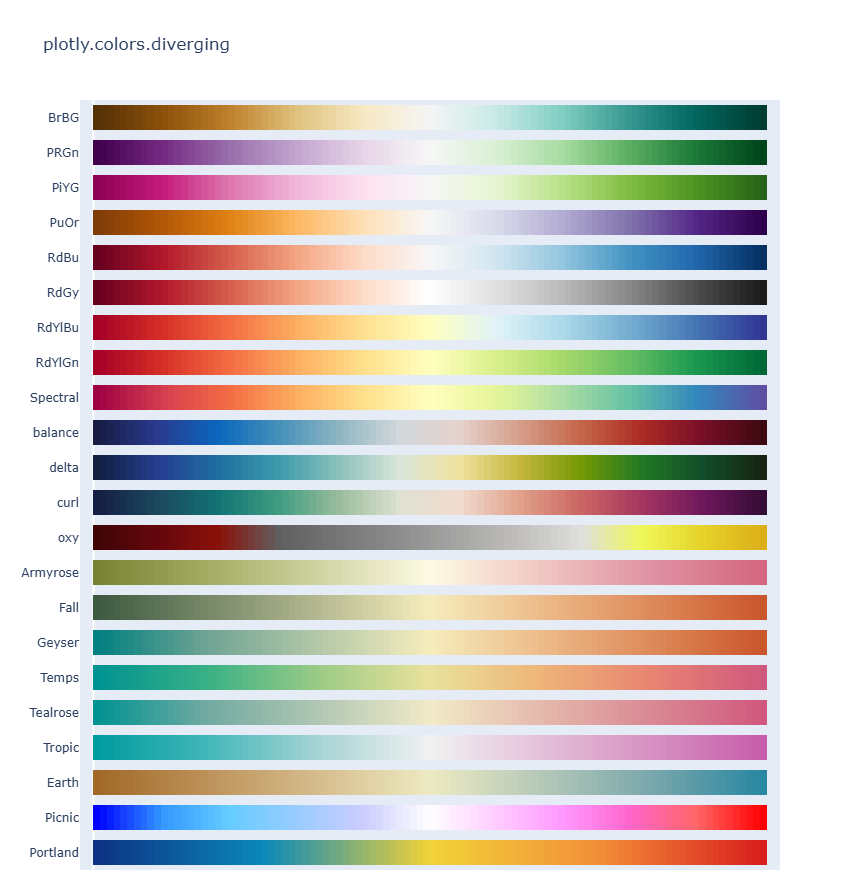

In [24]:
px.colors.diverging.swatches_continuous()

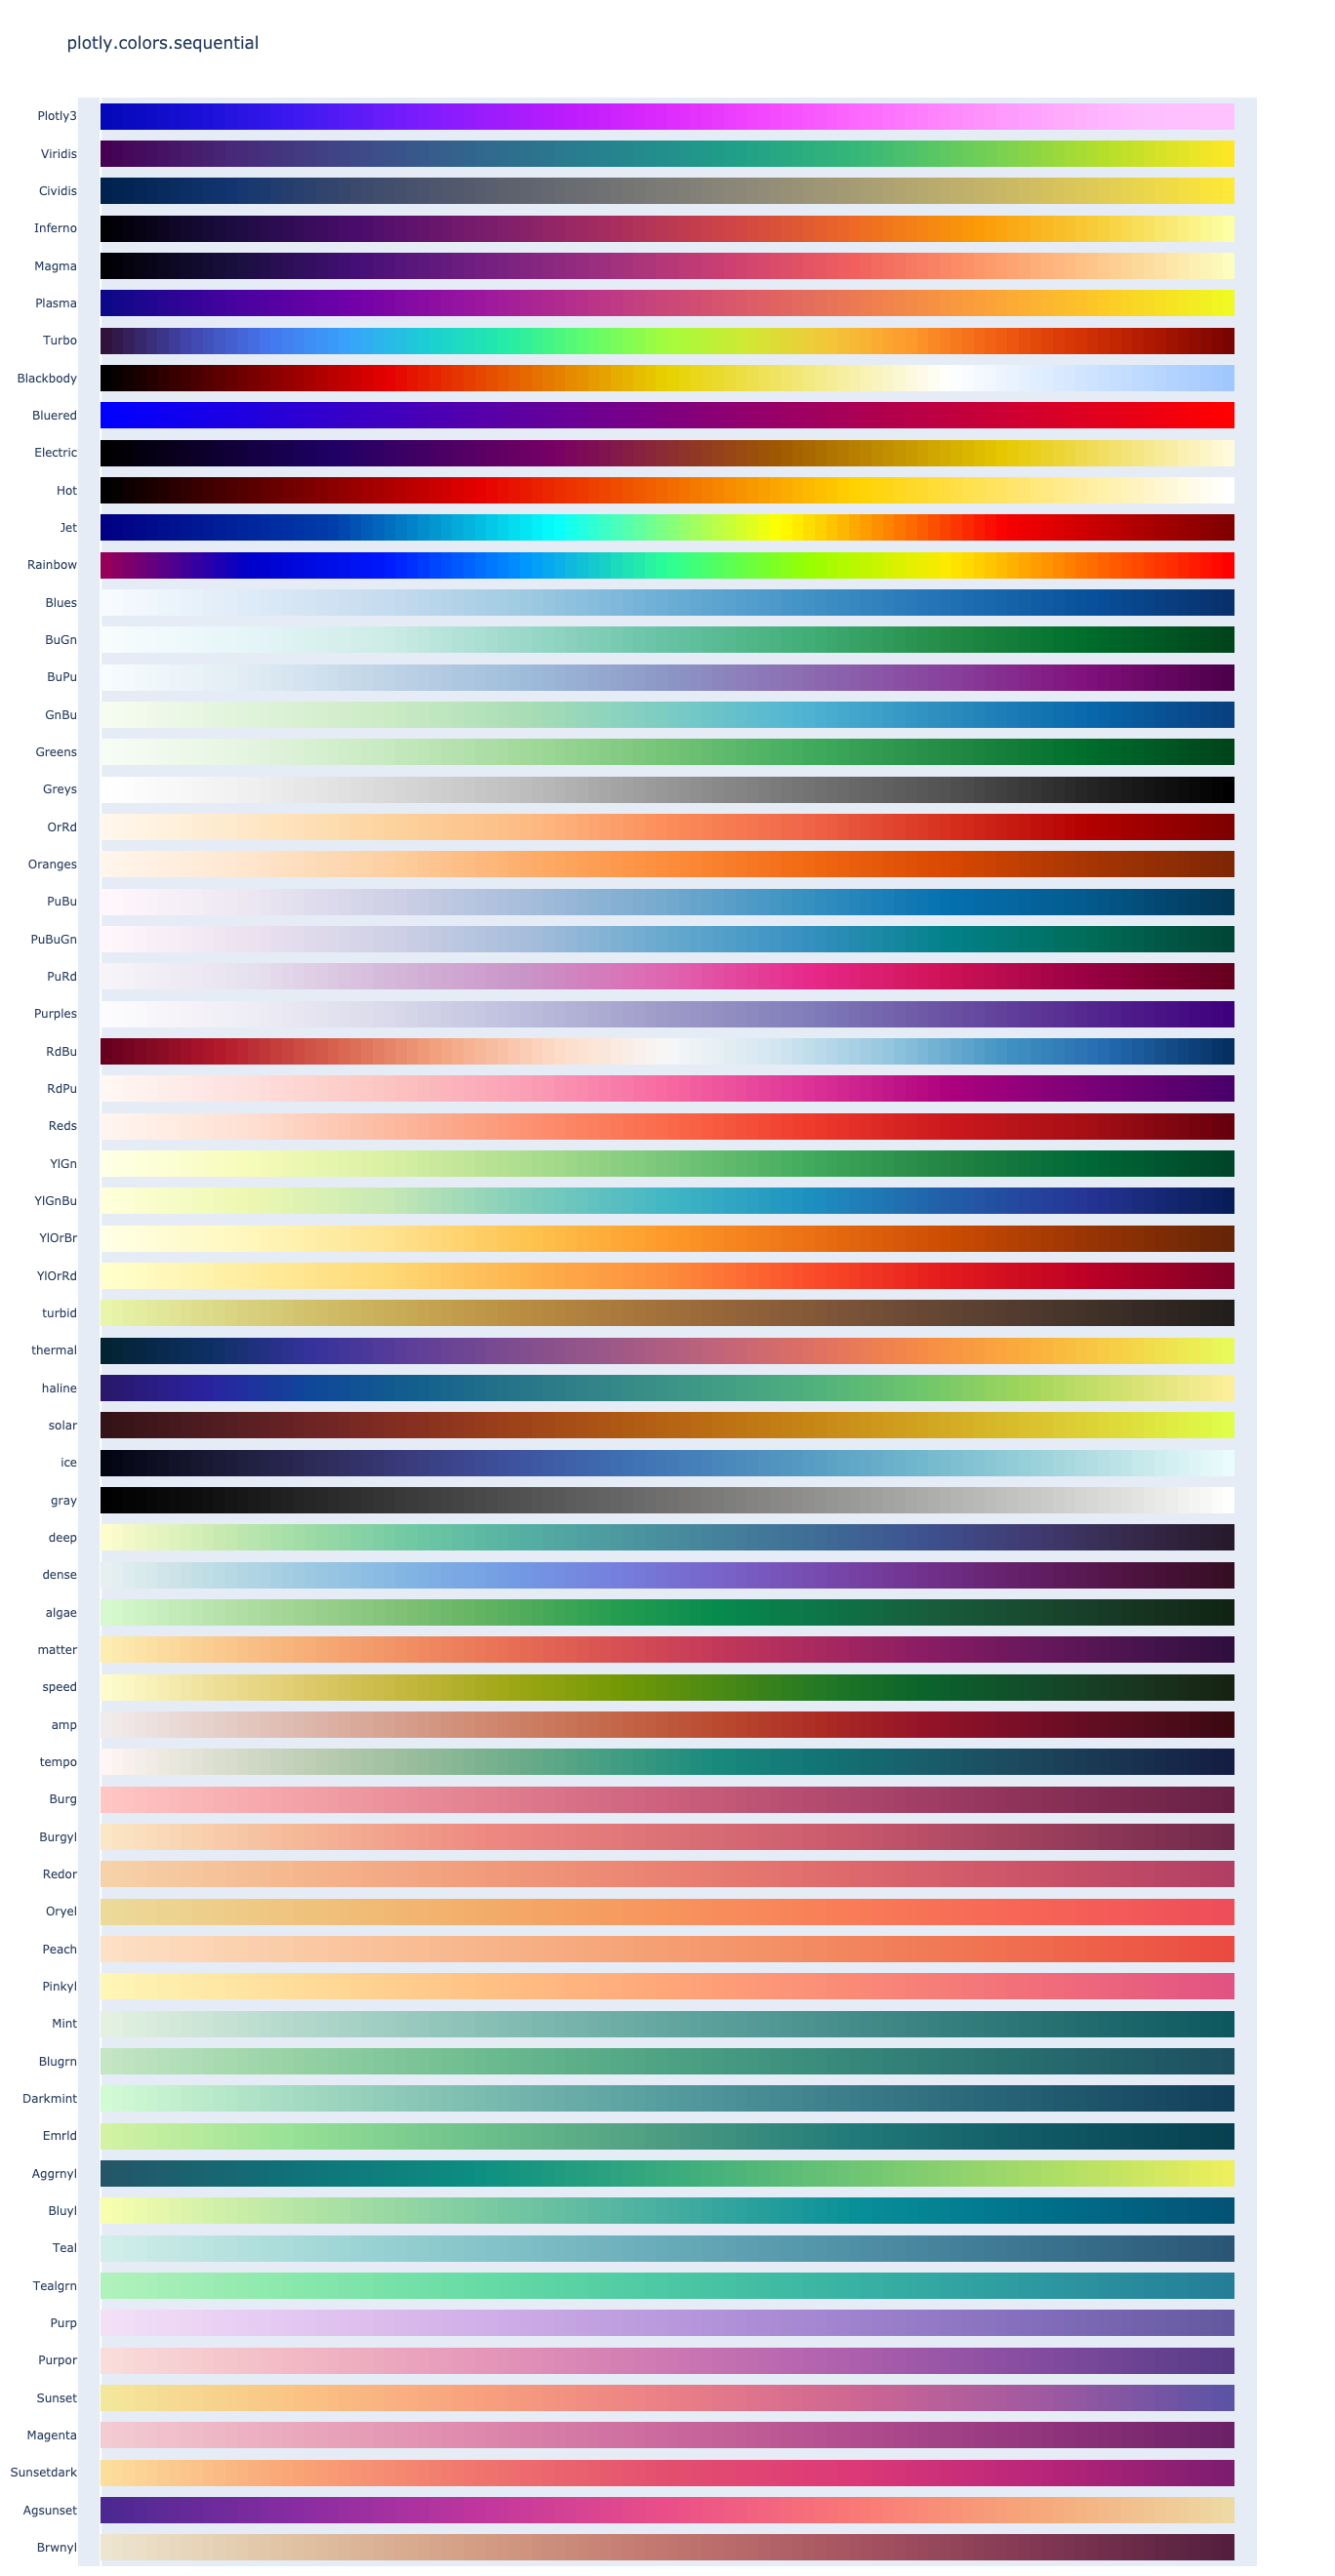

In [25]:
px.colors.sequential.swatches_continuous()

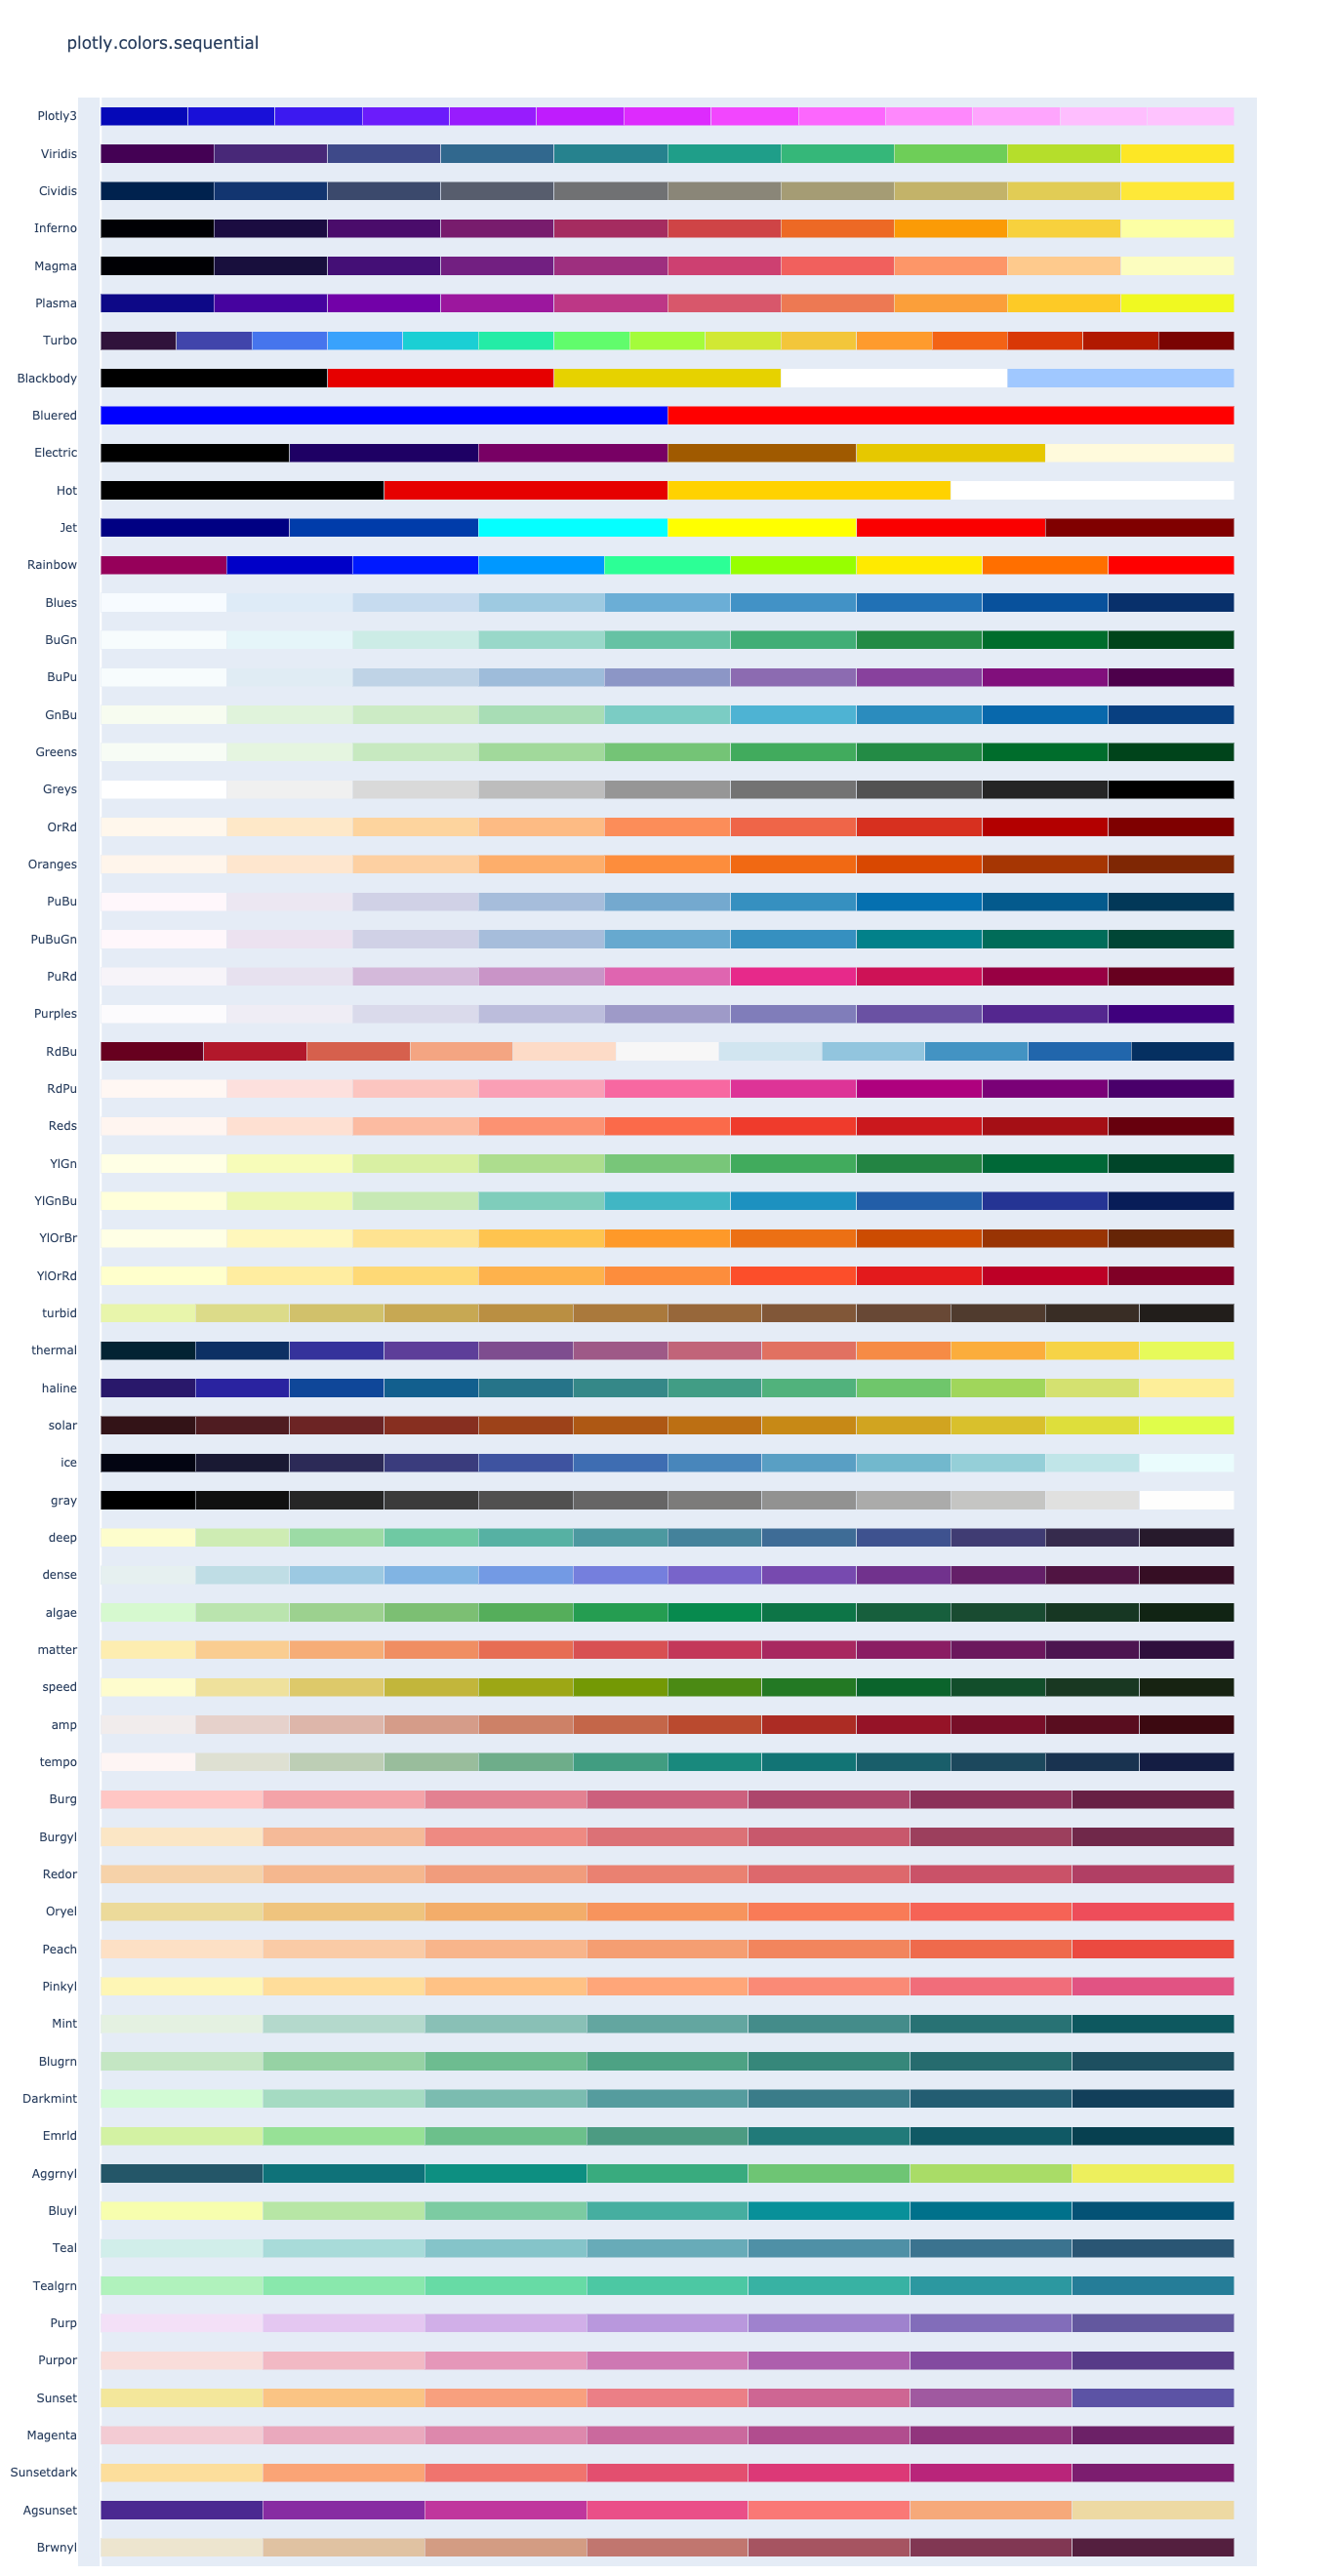

In [26]:
px.colors.sequential.swatches()

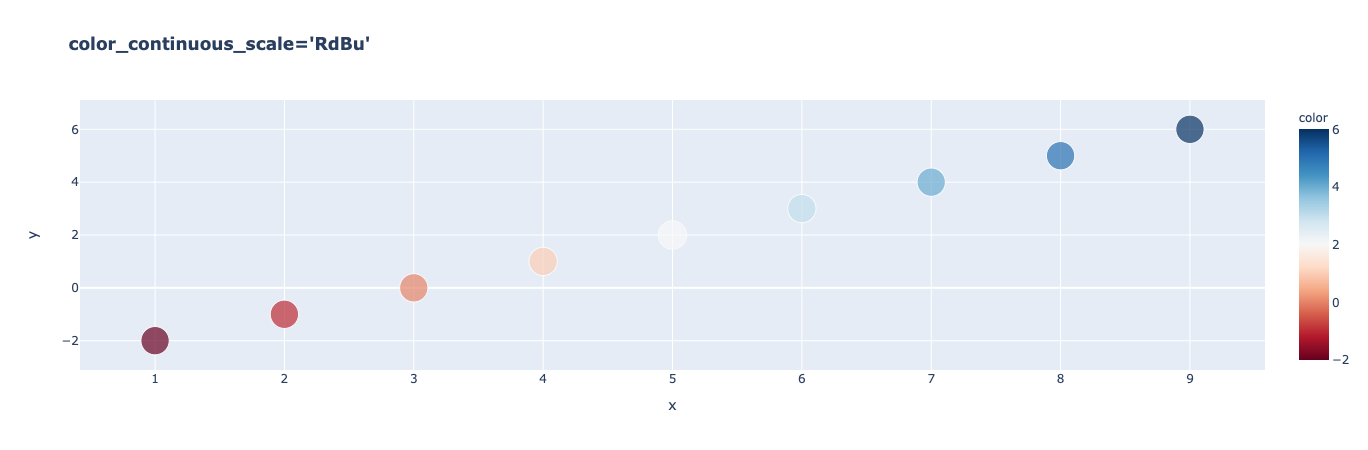

In [27]:
y = [-2, -1, 0, 1, 2, 3, 4, 5, 6]
px.scatter(x=range(1, len(y)+1), y=y, size=[10]*len(y), color=y, 
           color_continuous_scale='RdBu',
           title="<b>color_continuous_scale='RdBu'</b>")

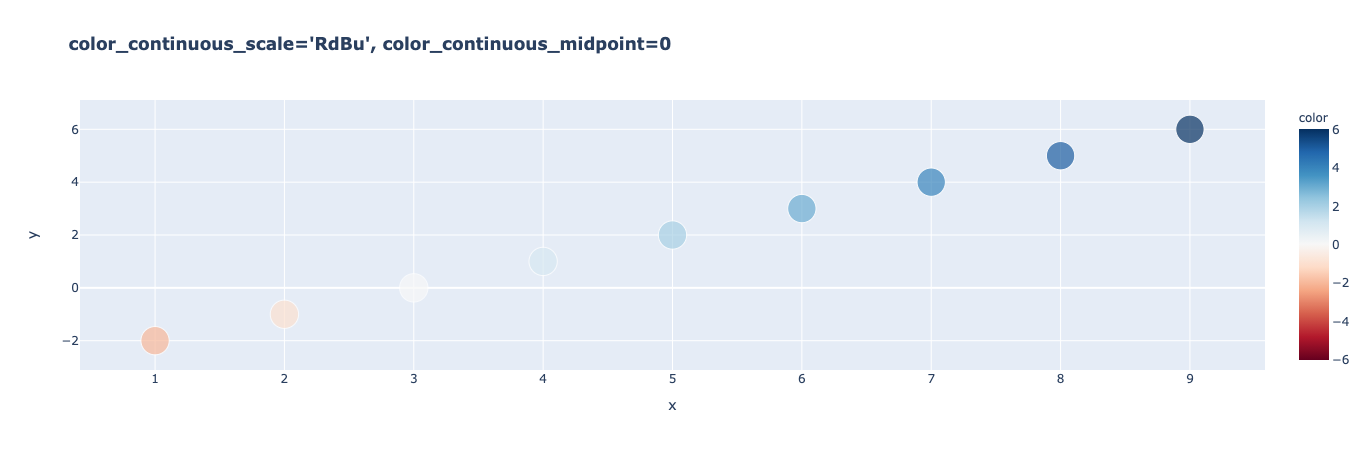

In [28]:
y = [-2, -1, 0, 1, 2, 3, 4, 5, 6]
px.scatter(x=range(1, len(y)+1), y=y, size=[10]*len(y), color=y, 
           color_continuous_scale='RdBu',
           color_continuous_midpoint=0,
           title="<b>color_continuous_scale='RdBu', color_continuous_midpoint=0</b>")

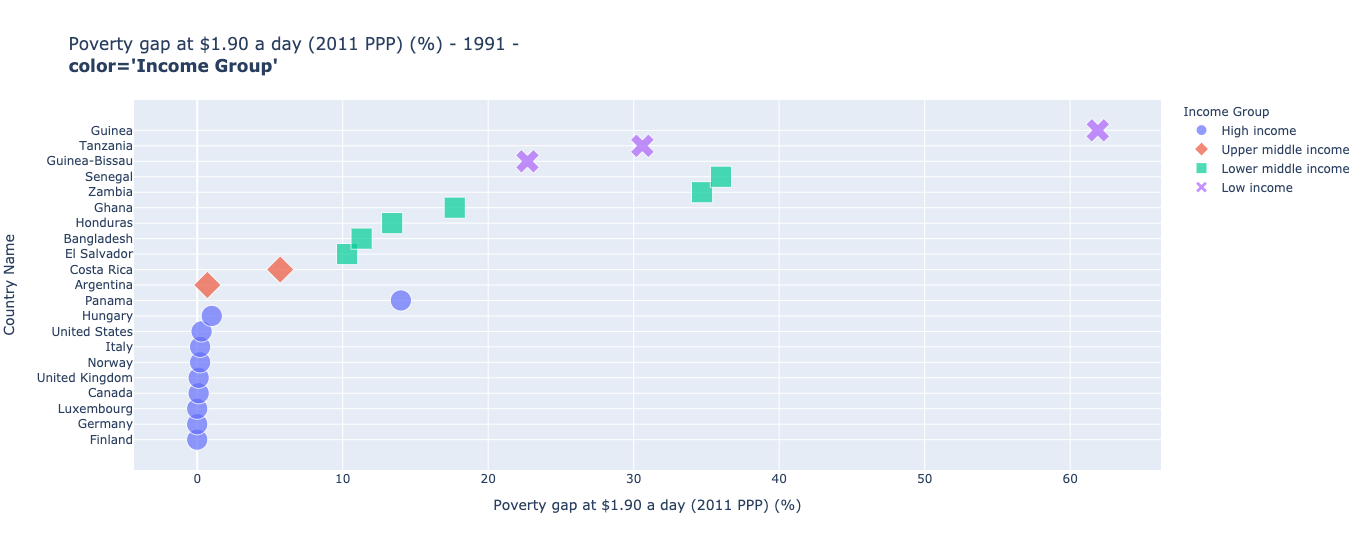

In [29]:
px.scatter(df,
           x=indicator, 
           y='Country Name',
           color='Income Group',
           symbol='Income Group',
                      title=' - '.join([indicator, str(year), "<br><b>color='Income Group'</b>"]),
           hover_name='Country Name',

           size_max=15,
           height=550,
           size=[10] * len(df))

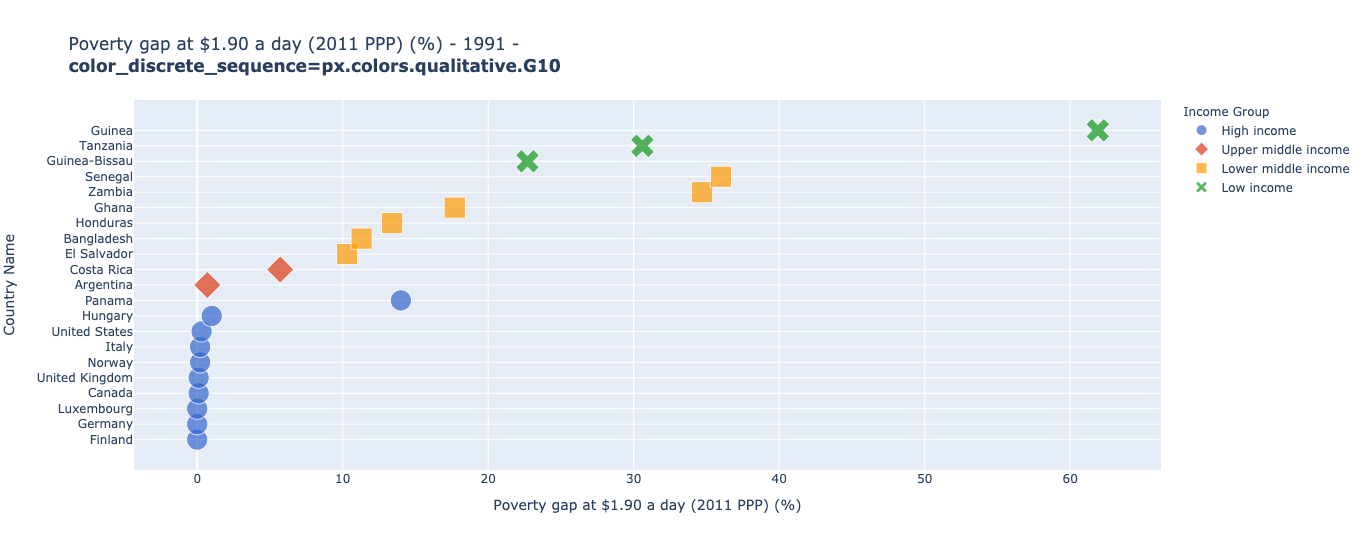

In [30]:
px.scatter(df,
           x=indicator, 
           y='Country Name',
           color='Income Group', 
           symbol='Income Group',
           color_discrete_sequence=px.colors.qualitative.G10,
           title=' - '.join([indicator, str(year), "<br><b>color_discrete_sequence=px.colors.qualitative.G10</b>"]),
           hover_name='Country Name',
           height=550,
           size_max=15,
           size=[10] * len(df))

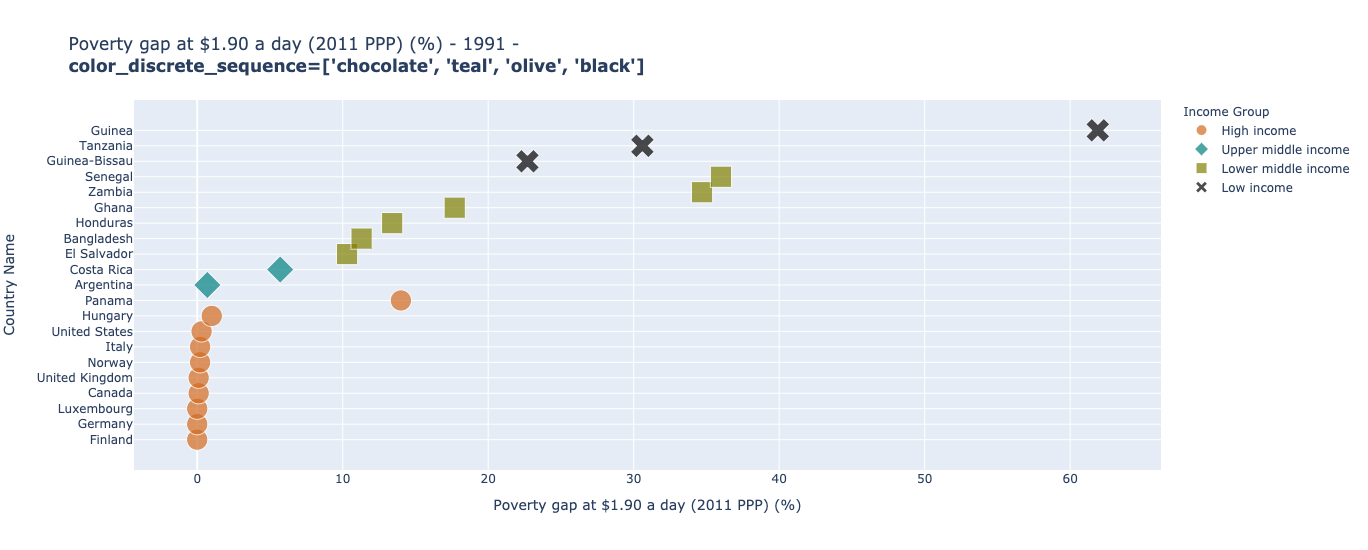

In [31]:
px.scatter(df,
           x=indicator, 
           y='Country Name',           
           color='Income Group', 
           symbol='Income Group',
           color_discrete_sequence=['chocolate', 'teal', 'olive', 'black'],
           title=' - '.join([indicator, str(year), "<br><b>color_discrete_sequence=['chocolate', 'teal', 'olive', 'black']</b>"]),
           hover_name='Country Name',
           height=550,
           size_max=15,
           size=[10] * len(df))

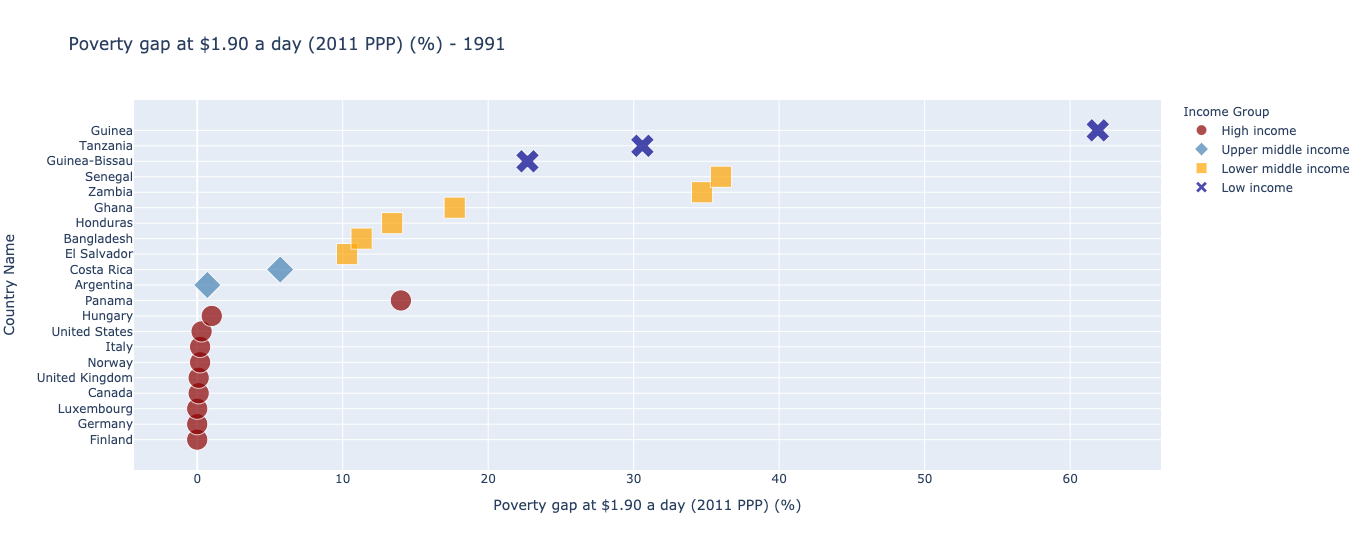

In [32]:
px.scatter(df,
           x=indicator, 
           y='Country Name',
           color='Income Group', 
           symbol='Income Group',
           color_discrete_map={'High income': 'darkred',
                               'Upper middle income': 'steelblue',
                               'Lower middle income': 'orange',
                               'Low income': 'darkblue'},
           title=' - '.join([indicator, str(year),]),
           hover_name='Country Name',
           height=550,
           size_max=15,
           size=[10] * len(df))

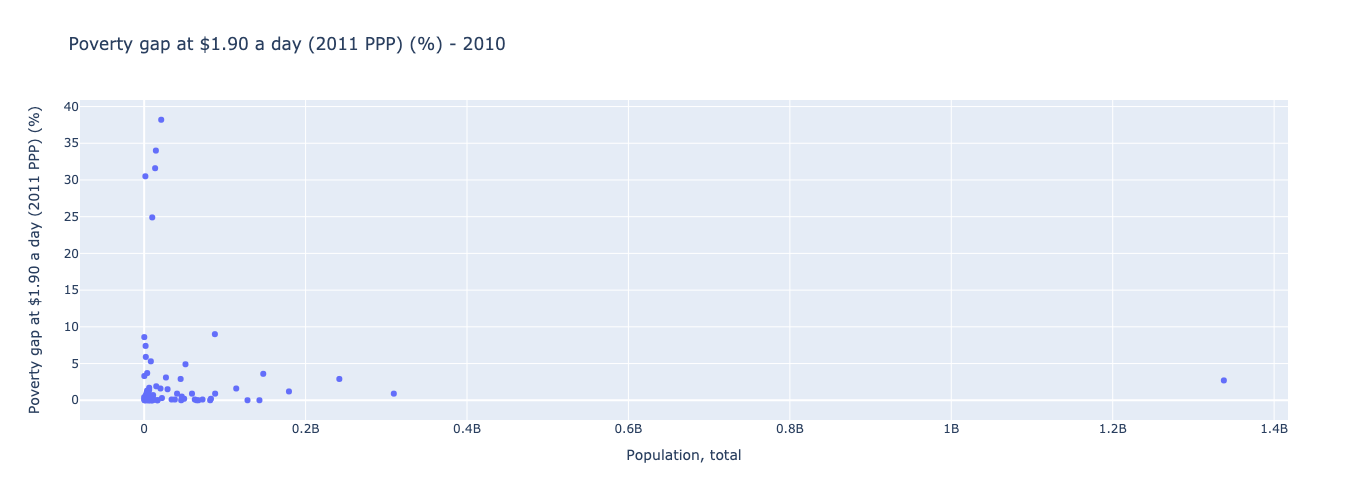

In [33]:
plotly_basic_symbols = [
 'circle', 'square', 'diamond', 'cross', 'x', 'triangle', 'pentagon', 'hexagram', 
    'star', 'diamond', 'hourglass', 'bowtie', 'asterisk', 'hash', 'y', 'line',
]

fig = go.Figure()
df = poverty[poverty['year'].eq(2010) & poverty['is_country']].sort_values('Population, total')

px.scatter(df,
           y=perc_pov_19,
           x='Population, total',
           title=' - '.join([perc_pov_19, '2010']),
           height=500)


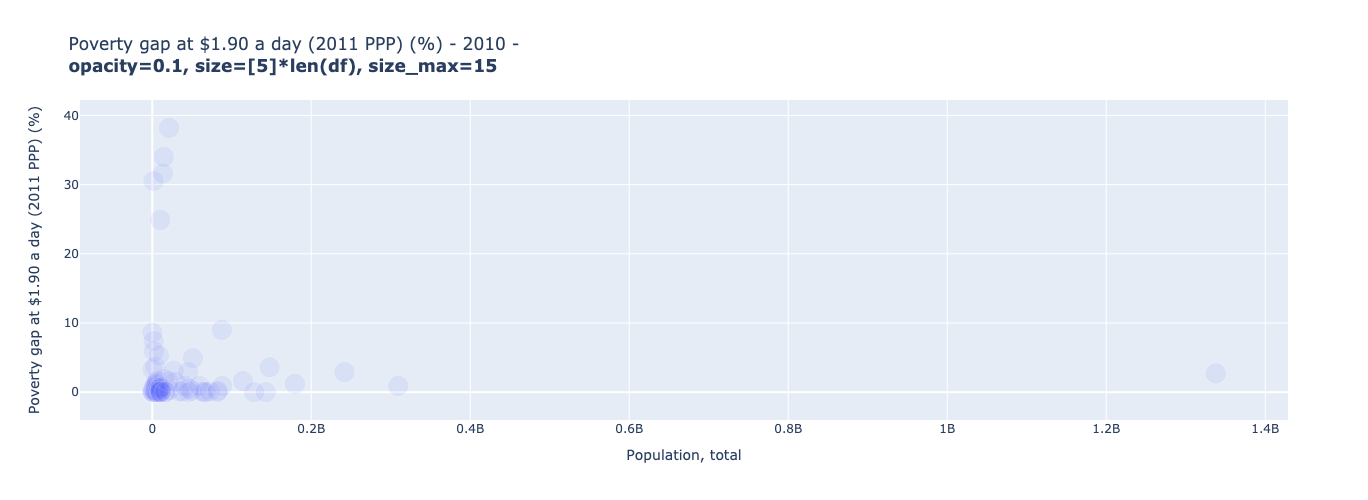

In [34]:
px.scatter(df,
           y=perc_pov_19,
           x='Population, total',
           opacity=0.1,
           title=' - '.join([perc_pov_19, '2010', '<br><b>opacity=0.1, size=[5]*len(df), size_max=15</b>']),
           height=500,
           size=[5]*len(df),
           size_max=15)

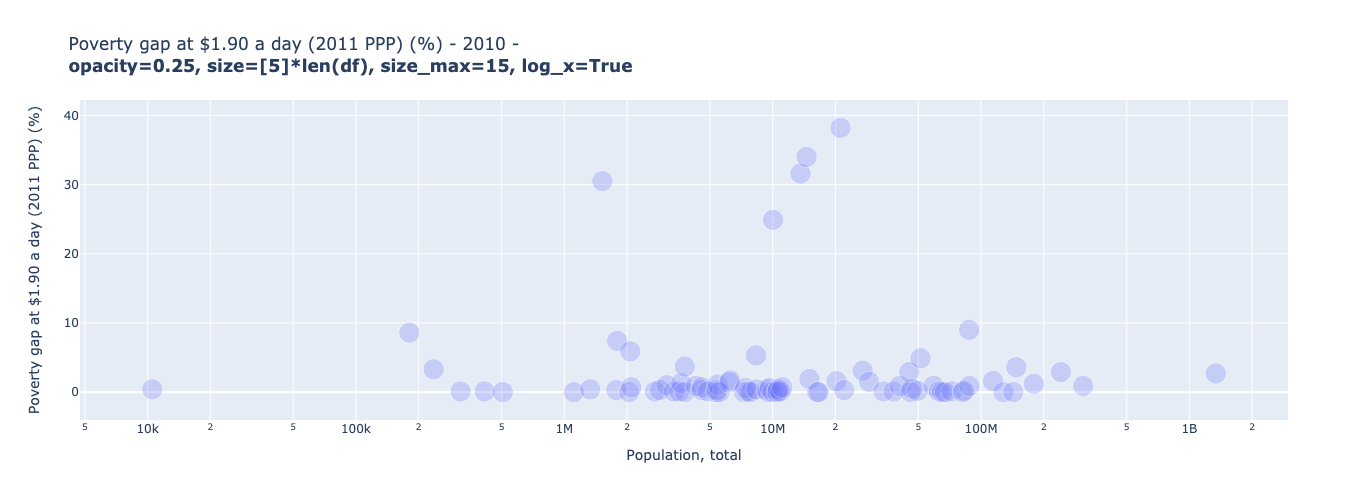

In [35]:
px.scatter(df,
           y=perc_pov_19,
           x='Population, total',
           opacity=0.25,
#            symbol_sequence=['circle-open'],
           title=' - '.join([perc_pov_19, '2010', '<br><b>opacity=0.25, size=[5]*len(df), size_max=15, log_x=True</b>']),
           height=500,
           size=[5]*len(df),
           size_max=15,
           log_x=True
          )


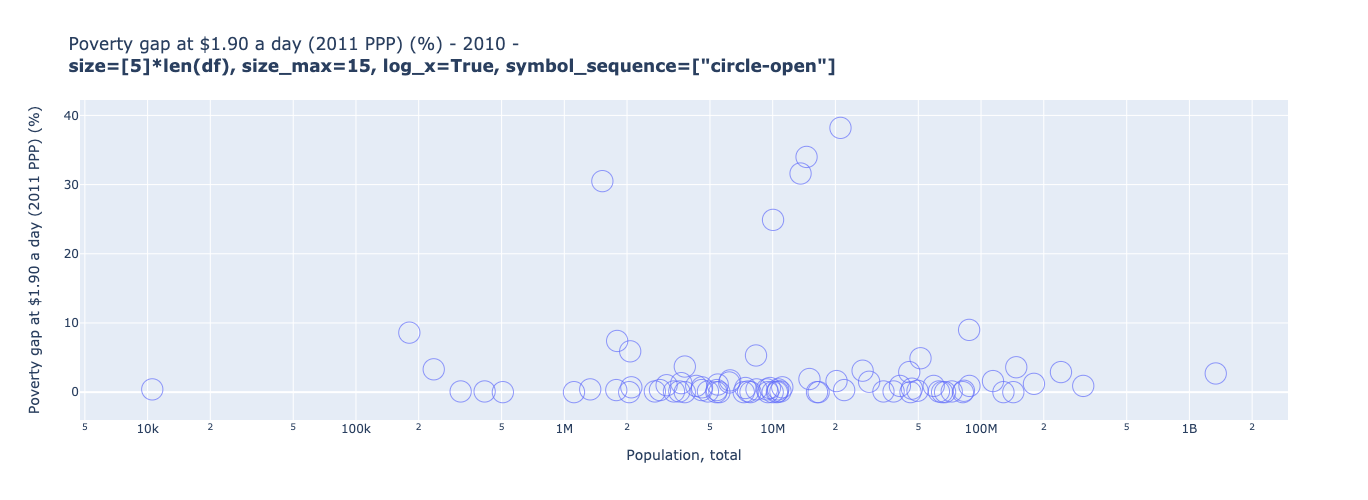

In [36]:
px.scatter(df,
           y=perc_pov_19,
           x='Population, total',
           symbol_sequence=['circle-open'],
           title=' - '.join([perc_pov_19, '2010', '<br><b>size=[5]*len(df), size_max=15, log_x=True, symbol_sequence=["circle-open"]</b>']),
           height=500,
           size=[5]*len(df),
           size_max=15,
           log_x=True
          )


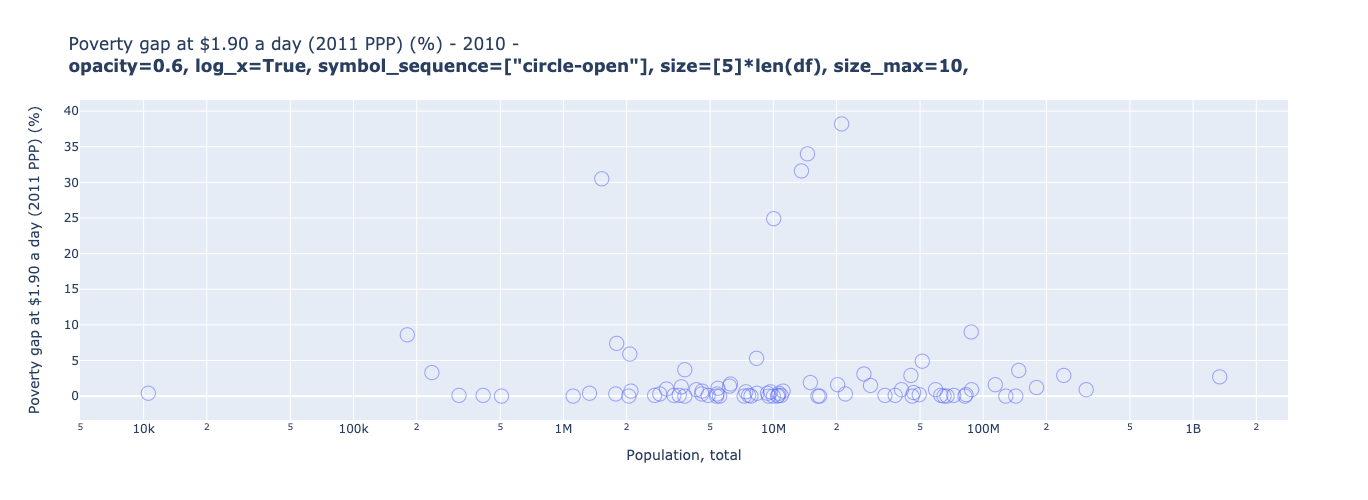

In [37]:
px.scatter(df,
           y=perc_pov_19,
           x='Population, total',
           opacity=0.6,
           symbol_sequence=['circle-open'],
           title=' - '.join([perc_pov_19, '2010', '<br><b>opacity=0.6, log_x=True, symbol_sequence=["circle-open"], size=[5]*len(df), size_max=10,</b>']),
           height=500,
           size=[5]*len(df),
           size_max=10,
           log_x=True)


In [38]:
app = JupyterDash(__name__)

app.layout = html.Div([
    html.Br(), html.Br(),
    dcc.Slider(min=0, 
               max=10,
               step=1,
               dots=True,
               included=False,
               
        marks={x: str(x) for x in range(11)}
              )
])

app.run_server(mode='inline', height=200)

In [39]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.COSMO])


perc_pov_df = poverty[poverty['is_country']].dropna(subset=perc_pov_cols)
perc_pov_years = sorted(set(perc_pov_df['year']))

cividis0 = px.colors.sequential.Cividis[0]

app.layout = html.Div([

    dbc.Row([
        dbc.Col(lg=1),
    dbc.Col([
        html.Br(),
        dbc.Label('Select poverty level:'),
        dcc.Slider(id='perc_pov_indicator_slider', 
                   min=0,
                   max=2,
                   step=1,
                   included=False,
                   value=0,
                   marks={0:  {'label': '$1.9', 'style': {'color': cividis0, 'fontWeight': 'bold'}}, 
                          1:  {'label': '$3.2', 'style': {'color': cividis0, 'fontWeight': 'bold'}},
                          2:  {'label': '$5.5', 'style': {'color': cividis0, 'fontWeight': 'bold'}}}),
        ], lg=2),
    dbc.Col([
        html.Br(),
        dbc.Label('Select year:'),
        dcc.Slider(id='perc_pov_year_slider',
                   min=perc_pov_years[0], 
                   max=perc_pov_years[-1],
                   step=1,
                   included=False,
                   value=2018,
                   marks={year: {'label': str(year), 
                                 'style': {'color': cividis0}} 
                          for year in perc_pov_years[::5]}),
        ], lg=5),
  ]),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='perc_pov_scatter_chart')
        ])
    ])
    
], style={'backgroundColor': '#E5ECF6'})


@app.callback(Output('perc_pov_scatter_chart', 'figure'),
              Input('perc_pov_year_slider', 'value'),
              Input('perc_pov_indicator_slider', 'value'))
def plot_perc_pov_chart(year, indicator):
    indicator = perc_pov_cols[indicator]
    df = (perc_pov_df
          [perc_pov_df['year'].eq(year)]
          .dropna(subset=[indicator])
          .sort_values(indicator))
    if df.empty:
        raise PreventUpdate

    fig = px.scatter(df,
                     x=indicator, 
                     y='Country Name',
                     color='Population, total', 
                     size=[30]*len(df),
                     size_max=15,
                     hover_name='Country Name',
                     height=250 +(20*len(df)),
                     color_continuous_scale='cividis',
                     title=indicator + '<b>: ' + f'{year}' +'</b>')
    fig.layout.paper_bgcolor = '#E5ECF6'
    fig.layout.xaxis.ticksuffix = '%'
    return fig


app.run_server(mode='inline', port=8051)